In [ ]:
!pip uninstall tensorflow

In [ ]:
!pip install tensorflow==2.9

In [ ]:
import tensorflow as tf

print("TensorFlow 버전:", tf.__version__)

In [ ]:
import tensorflow as tf

print("TensorFlow 버전:", tf.__version__)

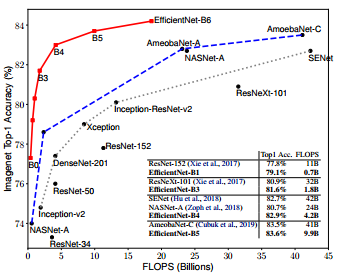

## 데이터 불러오기

참고 사이트: https://greeksharifa.github.io/computer%20vision/2022/03/01/EfficientNet/

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np

In [ ]:
import pickle
with open('/content/drive/Shareddrives/이미지 인식 프로젝트/데이터/x_train.pkl','rb') as f:
    x_train=pickle.load(f)

In [ ]:
# # zero-centering
# compute_mean = lambda imgs : np.mean(imgs, axis=0)

In [ ]:


  # x_train

In [ ]:
# x_train.shape

In [ ]:

# mean_img = compute_mean(x_train)
# mean_img.shape

In [ ]:
# sub_mean_img = lambda image : image.astype('int8') - mean_img.astype('int8')

## Train, Test,Val 데이터 증강하기

## 모델링 시작


### 모델링 할 때, 참고

### 모델링 할때 참고

## 1. early stopping
## 2. model-saving -> checkpoint
## 3. lr 조절
    1) ReduceLROnPlateau

    2) LearningRateScheduler

## 4. Tensorboard : ML 시각화 툴
    1)

    2) Summary Writer 활용 : 커스텀 시각화하는 것 - 좀 어렵다

## 모델링 할 때 배운 callbacks관련 것들 모두 사용하는, 예시)
    def my_scheduler(epoch, lr):
      if epoch < 2:
        return lr
      else:
        return lr * 0.1

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(my_scheduler, verbose=0)

    callbacks = [  
            tf.keras.callbacks.EarlyStopping(patience=2),  
            tf.keras.callba   0cks.ModelCheckpoint(filepath='model.{epoch:02d}-{loss:.2f}.h5'),  
            tf.keras.callbacks.TensorBoard(log_dir='./logs'),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=1, min_lr=0.001),
            tf.keras.callbacks.LearningRateScheduler(my_scheduler, verbose=0)                      
        ]  

        1. lr * 0.1 이거와 factor=0.2 충돌?
        2. 아니라고하면, lrs 과 ReduceLROnPlateau 누구꺼를 우선 순위?
        3. LRS에서 ReduceLROnPlateau의 factor을 설정해줄 수 없나? ex) 디폴트는 0.2 , 그리고 특정 조건 일때는 커스텀 함수를 사용




In [ ]:
import os

batch_size=200

In [ ]:
directory_path = '/content/drive/Shareddrives/이미지 인식 프로젝트/데이터/dataset300/train'

file_list = os.listdir(directory_path)

train_image = file_list
train_image

In [ ]:
directory_path = '/content/drive/Shareddrives/이미지 인식 프로젝트/데이터/dataset300/val'

file_list = os.listdir(directory_path)

val_image = file_list
val_image

In [ ]:
directory_path = '/content/drive/Shareddrives/이미지 인식 프로젝트/데이터/dataset300/test'

file_list = os.listdir(directory_path)

test_image = file_list
test_image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    # preprocessing_function=sub_mean_img
)

val_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator


# # 데이터 전처리 및 증강
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# val_datagen = ImageDataGenerator() # rescale=1.0/255
# test_datagen = ImageDataGenerator(# rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/Shareddrives/이미지 인식 프로젝트/데이터/dataset300/train',batch_size=batch_size, target_size=(260, 260))
val_generator = val_datagen.flow_from_directory('/content/drive/Shareddrives/이미지 인식 프로젝트/데이터/dataset300/val',batch_size=batch_size, target_size=(260, 260))
test_generator = test_datagen.flow_from_directory('/content/drive/Shareddrives/이미지 인식 프로젝트/데이터/dataset300/test',batch_size=batch_size, target_size=(260, 260))

## EfficientNet

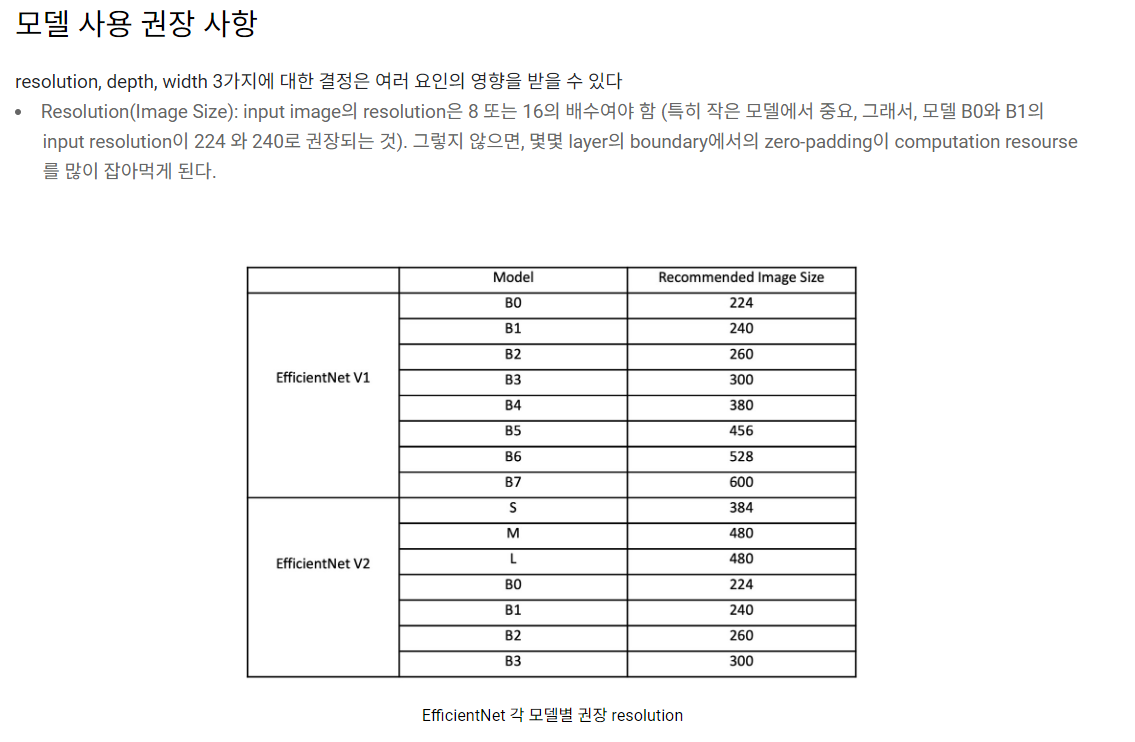

### EfficientNet0

#### call back custom

In [ ]:
from tensorflow import keras
import tensorflow as tf
# # 스케줄 함수 정의
# def learning_rate_schedule(epoch, current_lr):
#     if epoch < 10:
#         return 0.001  # 처음 10 에포크 동안 학습률을 고정
#     else:
#         return 0.0001  # 이후 에포크에서는 |학습률을 변경

# # LearningRateScheduler 콜백 생성
# lr_scheduler = keras.callbacks.LearningRateScheduler(learning_rate_schedule)
# keras.callbacks.LearningRateScheduler(learning_rate_schedule, verbose=0)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',verbose=1,patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=3, min_lr=0.001),

]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# EfficientNetB0 모델 로드
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(9, activation='softmax')
])

model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 50

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)


In [ ]:
# 모델 훈련
model.fit(train_generator,  validation_data=val_generator, epochs=epochs, callbacks=[es])

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
model.save('/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNetB0.h5')

#### fine-tune

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=5,restore_best_weights=True)

In [ ]:
## fine-tune
model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es], epochs=100)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
model.save('EfficientNetB0_fine-tune[:-20].h5')

In [ ]:
## fine-tune
model.trainable = True

for layer in base_model.layers[:-60]:
    layer.trainable = False

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es],epochs=50)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
model.save('EfficientNetB0_fine-tune[:-60].h5')

In [ ]:
## fine-tune
model.trainable = True

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es],epochs=25)
# plot_history_class(history.history)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
model.save('EfficientNetB0_fine-tune[:].h5')

### EfficientNet2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.optimizers import Adam

# EfficientNetB5 모델 로드
base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False

# Sequential 모델 생성
model = Sequential()

# EfficientNetB5 모델의 합성곱 레이어들을 Sequential 모델에 추가
model.add(base_model)

# Global Average Pooling 레이어 추가
model.add(GlobalAveragePooling2D())

# BatchNormalization 레이어 추가
model.add(BatchNormalization())

# Dense 레이어 추가 (128개의 뉴런과 활성화 함수는 ReLU)
model.add(Dense(128, activation='relu'))

# Dropout 레이어 추가 (50%의 뉴런을 비활성화)
model.add(Dropout(0.5))  # 0.5는 비활성화할 뉴런의 비율을 나타냄

# 출력 레이어 추가 (분류 클래스 수에 맞게 설정)
model.add(Dense(9, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 요약 출력
model.summary()


In [ ]:
from keras.callbacks import EarlyStopping

epochs = 50
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

In [ ]:
# 모델 훈련
model.fit(train_generator,  validation_data=val_generator, epochs=epochs, callbacks=[es])

In [ ]:
model.save('/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNet2/EfficientNetB2.keras')

In [ ]:
# # 모델 저장
# model.save('EfficientNet2.h5')

#### fine-tune

In [ ]:
## fine-tune
model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es], epochs=100)


# 모델 저장
# model.save('EfficientNet5_fine-tune[:-20].h5')


In [ ]:
model.save('/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNet2/EfficientNetB2[:-20].keras')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=5,restore_best_weights=True)

In [ ]:
## fine-tune
model.trainable = True

for layer in base_model.layers[:-60]:
    layer.trainable = False

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es],epochs=50)

loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
# model.save('EfficientNetB5_fine-tune[:-60].h5')

In [ ]:
model.save('/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNet2/EfficientNetB2[:-60].keras')

In [ ]:
## fine-tune
model.trainable = True

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es],epochs=50)
# plot_history_class(history.history)

loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
# model.save('EfficientNetB5_fine-tune[:].h5')


In [ ]:
model.save('/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNet2/EfficientNetB2[:].keras')

In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNet2/EfficientNetB2[:-60].keras'
model = load_model(model_path)


In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

### EfficientNet5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.optimizers import Adam

# EfficientNetB5 모델 로드
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(480, 480, 3))
base_model.trainable = False

# Sequential 모델 생성
model = Sequential()

# EfficientNetB5 모델의 합성곱 레이어들을 Sequential 모델에 추가
model.add(base_model)

# Global Average Pooling 레이어 추가
model.add(GlobalAveragePooling2D())

# BatchNormalization 레이어 추가
model.add(BatchNormalization())

# Dense 레이어 추가 (128개의 뉴런과 활성화 함수는 ReLU)
model.add(Dense(128, activation='relu'))

# Dropout 레이어 추가 (50%의 뉴런을 비활성화)
model.add(Dropout(0.5))  # 0.5는 비활성화할 뉴런의 비율을 나타냄

# BatchNormalization 레이어 추가
model.add(BatchNormalization())

# 출력 레이어 추가 (분류 클래스 수에 맞게 설정)
model.add(Dense(9, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 요약 출력
model.summary()


In [ ]:
from keras.callbacks import EarlyStopping

epochs = 50
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

In [ ]:
# 모델 훈련
model.fit(train_generator,  validation_data=val_generator, epochs=epochs, callbacks=[es])

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

In [ ]:
# 모델 저장
model.save('EfficientNet5.h5')

#### fine-tune

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=5,restore_best_weights=True)

In [ ]:
## fine-tune
model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es], epochs=100)

In [ ]:
# 모델 저장
model.save('EfficientNet5_fine-tune[:-20].h5')


In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

In [ ]:
## fine-tune
model.trainable = True

for layer in base_model.layers[:-60]:
    layer.trainable = False

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es],epochs=50)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

In [ ]:
# 모델 저장
model.save('EfficientNetB5_fine-tune[:-60].h5')

In [ ]:
## fine-tune
model.trainable = True

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es],epochs=50)
# plot_history_class(history.history)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

In [ ]:
# 모델 저장
model.save('EfficientNetB5_fine-tune[:].h5')

### EfficientNet7

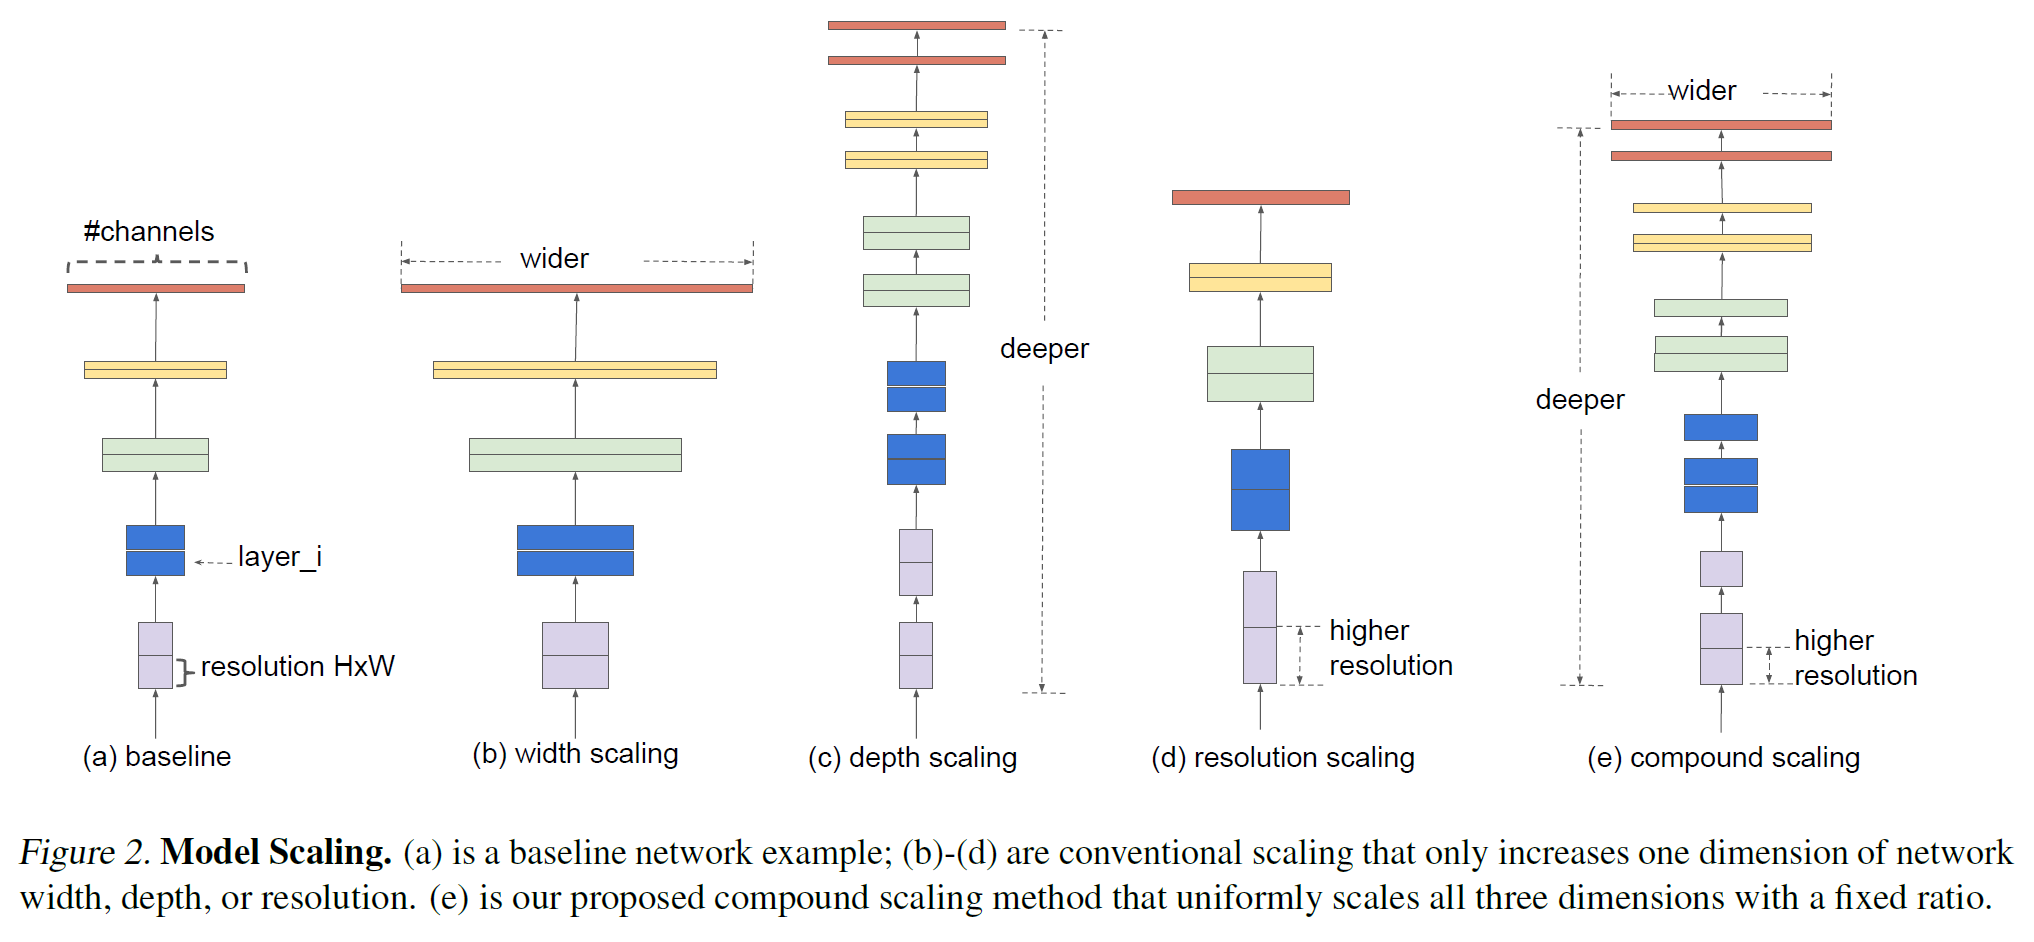

* 모델 성능을 높일 때 수동으로 조절했던 depth, width,

* resolution 사이의 관계을 수식으로 정리하여 한번에 스케일링하는 compound scaling을 제안, 더 짧은시간에 더 좋은 성능을 내는 모델을 만들고자 함
compound scaling을 적용한 EfficientNet을 제안하여 효율성을 높인 모델 구축

* 이 연구의 접근에서 중요한 요소는 무엇인가?

    기존에는 모델 성능 향상을 위해 width, depth, resolution 중 하나만 scaling했었는데 세가지 요소의 관계를 파악하여 수식으로 정의하고 세가지 요소를 모두 scaling 해보자!

* 논문을 보고 느낀점?

    원래 수동으로 하나씩 설정해주는게 정말 귀찮은 일이라서 모든것을 설정하면 좋다는 것을 알지만 안하는 사람들이 많은데 이 논문을 발표한 사람들은 그 많은 수동설정을 하고, 하나씩 비교했다는 점에서 열정과 오기를 보았다.

출처 : https://blog.kubwa.co.kr/%EB%85%BC%EB%AC%B8%EB%A6%AC%EB%B7%B0-efficientnet-rethinking-model-scaling-for-convolutional-neural-networks-2019-%EA%B0%84%EB%8B%A8%ED%95%9C-%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C-cbe0e9963ffc


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 생성기 및 하이퍼파라미터 설정
batch_size = 32
num_epochs = 4

# EfficientNetB7 모델 로드
base_model = EfficientNetB7(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# 커스텀 분류 레이어 추가
model = tf.keras.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

# 모델 컴파일
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 훈련 데이터 및 검증 데이터로 모델 훈련
history = model.fit(
    train_generator,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

# 모델 평가
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


In [ ]:
# 58076736/258076736 [==============================] - 2s 0us/step
# Epoch 1/4
# 51/51 [==============================] - 10217s 199s/step - loss: 2.3553 - accuracy: 0.1623 - val_loss: 2.0473 - val_accuracy: 0.2119
# Epoch 2/4
# 51/51 [==============================] - 9725s 192s/step - loss: 2.0862 - accuracy: 0.2027 - val_loss: 2.0114 - val_accuracy: 0.2308
# Epoch 3/4
# 51/51 [==============================] - 9832s 194s/step - loss: 2.0466 - accuracy: 0.2125 - val_loss: 1.9631 - val_accuracy: 0.2803
# Epoch 4/4
# 51/51 [==============================] - 9848s 194s/step - loss: 2.0070 - accuracy: 0.2389 - val_loss: 1.9090 - val_accuracy: 0.2944
# 17/17 [==============================] - 2386s 140s/step - loss: 1.9141 - accuracy: 0.2842
# Test Accuracy: 0.2842199504375458

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
model.save('/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNetB7.keras')

#### fine-tune
플롭스(FLOPS, FLoating point Operations Per Second)는 컴퓨터의 성능을 수치로 나타낼 때 주로 사용되는 단위이다. 초당 부동소수점 연산이라는 의미로 컴퓨터가 1초동안 수행할 수 있는 부동소수점 연산의 횟수를 기준으로 삼는다.

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=5,restore_best_weights=True)

In [ ]:
## fine-tune
model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es],epochs=100)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
model.save('/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNetB7_fine-tune[:-20].keras')

In [ ]:
## fine-tune
model.trainable = True

for layer in base_model.layers[:-60]:
    layer.trainable = False

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es],epochs=50)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
model.save('/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNetB7_fine-tune[:-60].keras')

In [ ]:
## fine-tune
model.trainable = True

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.00001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

history=model.fit(train_generator, batch_size = 50, validation_data=val_generator, callbacks=[es],epochs=25)
# plot_history_class(history.history)

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("평가 손실:", loss)
print("평가 정확도:", accuracy)

# 모델 저장
model.save('/content/drive/Shareddrives/이미지 인식 프로젝트/모델링/한동훈_모델링/EfficientNetB7_fine-tune[:].keras')

### EfficientNetV2(21k)

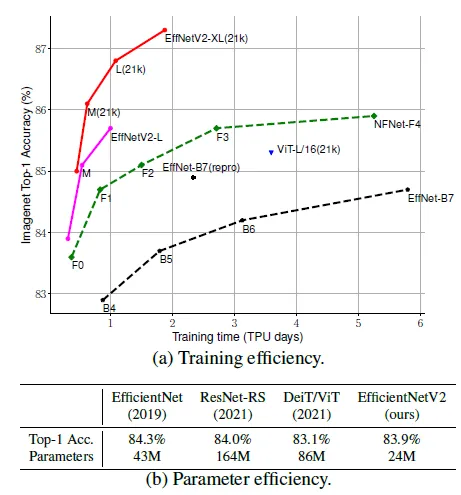

# 모델 loss, accuracy 평가

### 1차 : HDH_model.h5 저장, loss: 1.56, accuracy: 45%
### 2차 : HDH_model_EfficientNet0.h5 저장, loss: 4.2542 - accuracy: 0.0762
### 3차 : HDH_model_EfficientNet3.h5 저장, Epoch 1/4 loss: 2.2236 - accuracy: 0.0945

### 4차: HDH_model_restNet_plus.h5 저장,

### 5차: HDH_model.EfficientNet7,

### 6차: HDH_model.EfficientNet7+fine-tune,


# 출처 및 참조
*   https://bigsong.tistory.com/47

캐글
*  https://www.kaggle.com/datasets/xhlulu/efficientnet-keras-source-code/code



논문
*   https://proceedings.mlr.press/v97/tan19a.html
*   https://proceedings.mlr.press/v97/tan19a/tan19a.pdf





